In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from scipy.stats import sem

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count", sem]
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _va

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std", sem])

In [8]:
compiled_grouped_res

mae                           max_error  \
                                     mean       std count       sem      mean   
representation num_train_points                                                 
inchi          10                1.437920       NaN     1       NaN  4.600000   
               50                1.181760  0.114081     5  0.051019  4.214000   
               100               1.085672  0.081901     5  0.036627  4.096000   
               200               1.073540  0.044853     4       NaN  4.392500   
               500               0.995440  0.080995     4  0.040497  4.125000   
iupac_name     10                1.416728  0.563547     2  0.398488  4.365000   
               50                1.137780  0.051562     2  0.036460  4.430000   
               100               1.047600       NaN     1       NaN  3.630000   
               200               1.108240       NaN     1       NaN  3.900000   
               500               0.902720       NaN     1       NaN  3.910000   
selfies        10                1.038587  0.078144     3       NaN  3.916667   
               50                1.168710  0.093445     4  0.046722  4.487500   
               100               1.051293  0.028275     3  0.016324  3.643333   
               200               1.046200  0.049667     2  0.035120  3.865000   
               500               1.025560  0.023589     2  0.016680  4.115000   
smiles         10                1.140880  0.251251     5       NaN  3.800000   
               50                1.099815  0.049058     8       NaN  4.092500   
               100               1.029500  0.026058     8       NaN  3.995000   
               200               1.054669  0.094064     7  0.035553  3.824286   
               500               0.910973  0.054165     6  0.022113  3.586667   

                                                                mse            \
                                      std count       sem      mean       std   
representation num_train_points                                                 
inchi          10                     NaN     1       NaN  3.184414       NaN   
               50                0.561364     5  0.251050  2.209326  0.380525   
               100               0.813744     5  0.363918  1.869896  0.314177   
               200               0.339055     4       NaN  1.918404  0.128970   
               500               0.737812     4  0.368906  1.658593  0.348872   
iupac_name     10                0.091924     2  0.065000  3.065255  2.082825   
               50                0.042426     2  0.030000  2.102268  0.191251   
               100                    NaN     1       NaN  1.645902       NaN   
               200                    NaN     1       NaN  1.924461       NaN   
               500                    NaN     1       NaN  1.354638       NaN   
selfies        10                0.375278     3       NaN  1.687330  0.338231   
               50                0.361421     4  0.180710  2.205331  0.329119   
               100               0.505206     3  0.291681  1.751300  0.019531   
               200               0.332340     2  0.235000  1.758262  0.254772   
               500               0.445477     2  0.315000  1.680527  0.102651   
smiles         10                0.354894     5       NaN  2.029157  0.961682   
               50                0.467997     8       NaN  1.937506  0.242218   
               100               0.289581     8       NaN  1.674136  0.071871   
               200               0.321914     7  0.121672  1.810238  0.330768   
               500               0.357025     6  0.145755  1.355500  0.169144   

                                                 
                                count       sem  
representation num_train_points                  
inchi          10                   1       NaN  
               50                   5  0.170176  
               100                  5  0.140504  
          

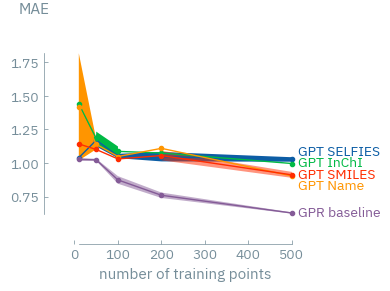

In [9]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["selfies", :].index,
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"],
    label="GPT SELFIES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["selfies", :].index,
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
    - compiled_grouped_res.loc["selfies", :]["mae"]["sem"],
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
    + compiled_grouped_res.loc["selfies", :]["mae"]["sem"],
)

ax.plot(
    compiled_grouped_res.loc["inchi", :].index,
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"],
    label="GPT InChI",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["inchi", :].index,
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
    - compiled_grouped_res.loc["inchi", :]["mae"]["sem"],
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
    + compiled_grouped_res.loc["inchi", :]["mae"]["sem"],
)

ax.plot(
    compiled_grouped_res.loc["iupac_name", :].index,
    compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"],
    label="GPT Name",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["iupac_name", :].index,
    compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
    - compiled_grouped_res.loc["iupac_name", :]["mae"]["sem"],
    compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
    + compiled_grouped_res.loc["iupac_name", :]["mae"]["sem"],
)

ax.plot(
    compiled_grouped_res.loc["smiles", :].index,
    compiled_grouped_res.loc["smiles", :]["mae"]["mean"],
    label="GPT SMILES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["smiles", :].index,
    compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
    - compiled_grouped_res.loc["smiles", :]["mae"]["sem"],
    compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
    + compiled_grouped_res.loc["smiles", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped["mae"]["mean"],
    label="GPR baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["sem"],
    compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["sem"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE")
# ax.set_xscale('log')

range_frame(
    ax, 
     compiled_gpr_grouped.loc[:].index,
    np.array([np.max( compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
    + compiled_grouped_res.loc["iupac_name", :]["mae"]["sem"]),  np.min( compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["sem"])])
)

fig.savefig("lipophilicity_regression_res.pdf", bbox_inches="tight")